### Exercício 16. Pesos de Papel Descartado
#### Use a distribuição de frequência do Exercício 24, na seção 2-2, para contruir o histograma.

In [3]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# versões bibliotecas
print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Pandas: 2.2.3
Versão Matplotlib: 3.10.0


In [4]:
# valores do exercício
valores = [6.16, 7.98, 9.64, 8.08, 10.99, 13.11, 3.26, 1.65, 10.00, 8.96, 9.46, 5.88, 8.26, 12.45,
           10.58, 5.87, 8.78, 11.03, 12.29, 20.58, 12.56, 9.92, 3.45, 9.09, 3.69, 2.61, 2.41, 7.57,
           9.55, 8.82, 8.72, 6.96, 6.83, 11.42, 16.08, 6.38, 13.05, 11.36, 15.09, 2.80, 6.44, 5.86,
           11.08, 12.43, 6.05, 13.61, 6.98, 14.33, 13.31, 3.27, 6.67, 17.65, 12.73, 9.83, 16.39, 6.33,
           9.19, 9.41, 9.45, 12.32, 20.12, 7.72]

In [5]:
# valores ordenados
ordenados = pd.Series(valores).sort_values()
ordenados

7      1.65
26     2.41
25     2.61
39     2.80
6      3.26
      ...  
34    16.08
54    16.39
51    17.65
60    20.12
19    20.58
Length: 62, dtype: float64

In [6]:
# dicionário de dados com as classes
descarte = {
    "Pesos de Papel Descartado (lb)" : ['1,00 - 4,99', '5,00 - 8,99', '9,00 - 12,99', '13,00 - 16,99', '17,00 - 20,99']
}

In [8]:
# categorizar os dados em classes
bins = [1.00, 5.00, 9.00, 13.00, 17.00, 21.00]
cat = pd.cut(x = ordenados, bins = bins, labels = descarte["Pesos de Papel Descartado (lb)"], include_lowest = True, right = False)

In [12]:
# gerar a frequência dos dados para cada classe
freq = cat.value_counts().sort_index()
freq

1,00 - 4,99       8
5,00 - 8,99      21
9,00 - 12,99     22
13,00 - 16,99     8
17,00 - 20,99     3
Name: count, dtype: int64

In [13]:
# gerar distribuição de frequência completa
df = pd.DataFrame(descarte)
df["Frequência"] = freq.tolist()
df["Frequência Relativa"] = ((df["Frequência"] / df["Frequência"].sum())*100).round(2)
df["Frequência Acumulada"] = df["Frequência"].cumsum()
df

,Pesos de Papel Descartado (lb),Frequência,Frequência Relativa,Frequência Acumulada
0,"1,00 - 4,99",8,12.90,8
1,"5,00 - 8,99",21,33.87,29
2,"9,00 - 12,99",22,35.48,51
3,"13,00 - 16,99",8,12.90,59
4,"17,00 - 20,99",3,4.84,62


In [17]:
# gerar fronteiras de classe para o histograma
front1 = float(input("Qual a primeira fronteira de classe?"))
ampltd = float(input("Qual a amplitude de classe?"))
front2 = float(input("Qual a última fronteira de classe?"))

ff = []
while front1 <= front2:
    ff.append(round(front1, 3))
    front1+=ampltd
ff

Qual a primeira fronteira de classe? 4.995
Qual a amplitude de classe? 4
Qual a última fronteira de classe? 21


[4.995, 8.995, 12.995, 16.995, 20.995]

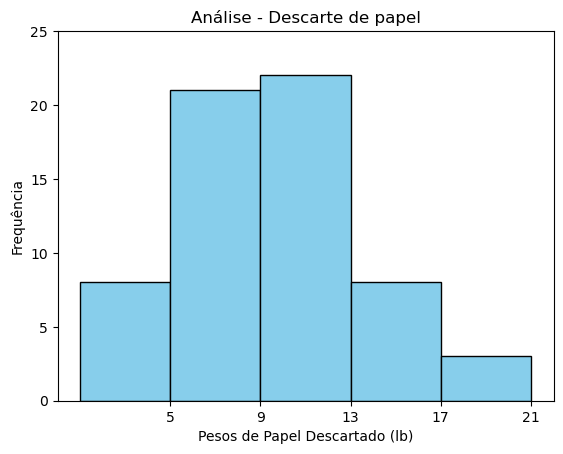

In [23]:
# plotar histograma
plt.title("Análise - Descarte de papel")
plt.xlabel("Pesos de Papel Descartado (lb)")
plt.ylabel("Frequência")
plt.hist(x = valores, bins = bins, color = 'skyblue', edgecolor = 'black')
plt.xticks(ff)
plt.ylim(0, 25)
plt.show()

### Os pesos de papel descartado parecem ter uma distribuição normal?

Se, e somente se, fizermos uma análise mais relaxada dos critérios.